<a href="https://colab.research.google.com/github/Upendra-source/Upendra-source/blob/main/8_Vision_AI_Fundamentals_Building_a_Digit_Recognizer_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [5]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [6]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [7]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [8]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [9]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7493 - loss: 0.7229
Epoch 1: val_loss improved from inf to 0.42968, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7494 - loss: 0.7227 - val_accuracy: 0.8431 - val_loss: 0.4297
Epoch 2/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3861
Epoch 2: val_loss improved from 0.42968 to 0.38728, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8614 - loss: 0.3861 - val_accuracy: 0.8613 - val_loss: 0.3873
Epoch 3/30
930/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8772 - loss: 0.3391
Epoch 3: val_loss improved from 0.38728 to 0.37643, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8772 - loss: 0.3390 - val_accuracy: 0.8619 - val_loss: 0.3764
Epoch 4/30
916/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [11]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7432 - loss: 0.7259
Epoch 1: val_loss improved from inf to 0.37527, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7432 - loss: 0.7257 - val_accuracy: 0.8655 - val_loss: 0.3753
Epoch 2/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8773 - loss: 0.3431
Epoch 2: val_loss improved from 0.37527 to 0.34329, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8773 - loss: 0.3430 - val_accuracy: 0.8807 - val_loss: 0.3433
Epoch 3/30
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8928 - loss: 0.2925
Epoch 3: val_loss improved from 0.34329 to 0.31499, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8928 - loss: 0.2925 - val_accuracy: 0.8819 - val_loss: 0.3150
Epoch 4/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [12]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6411 - loss: 1.0715
Epoch 1: val_loss improved from inf to 0.46016, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6412 - loss: 1.0712 - val_accuracy: 0.8274 - val_loss: 0.4602
Epoch 2/30
925/938 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8137 - loss: 0.5209
Epoch 2: val_loss improved from 0.46016 to 0.38266, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8138 - loss: 0.5205 - val_accuracy: 0.8627 - val_loss: 0.3827
Epoch 3/30
926/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.4408
Epoch 3: val_loss did not improve from 0.38266
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8432 - loss: 0.4407 - val_accuracy: 0.8306 - val_loss: 0.4397
Epoch 4/30
925/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8506 - loss: 0.4075
Epoch 4: val_

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


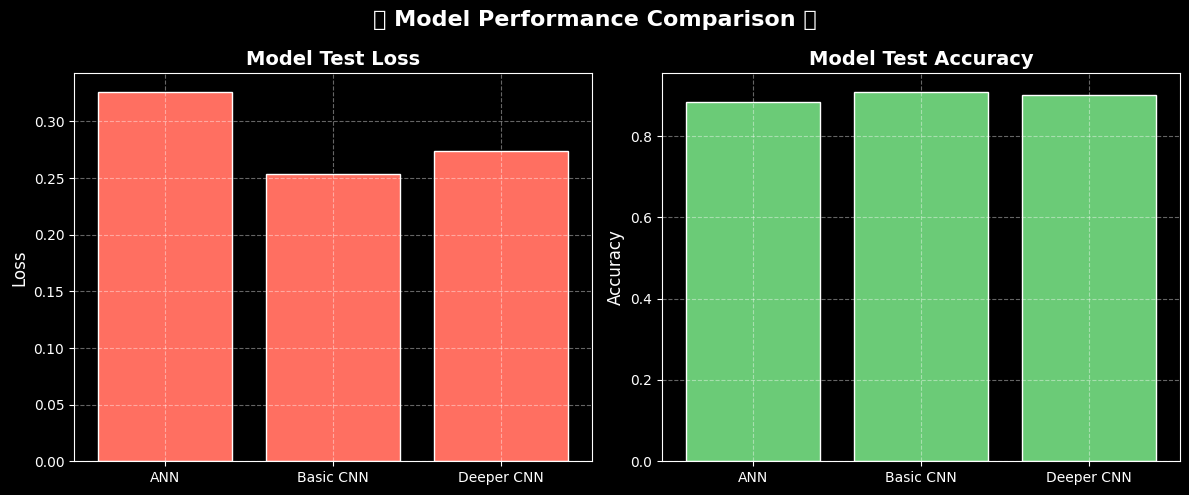

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


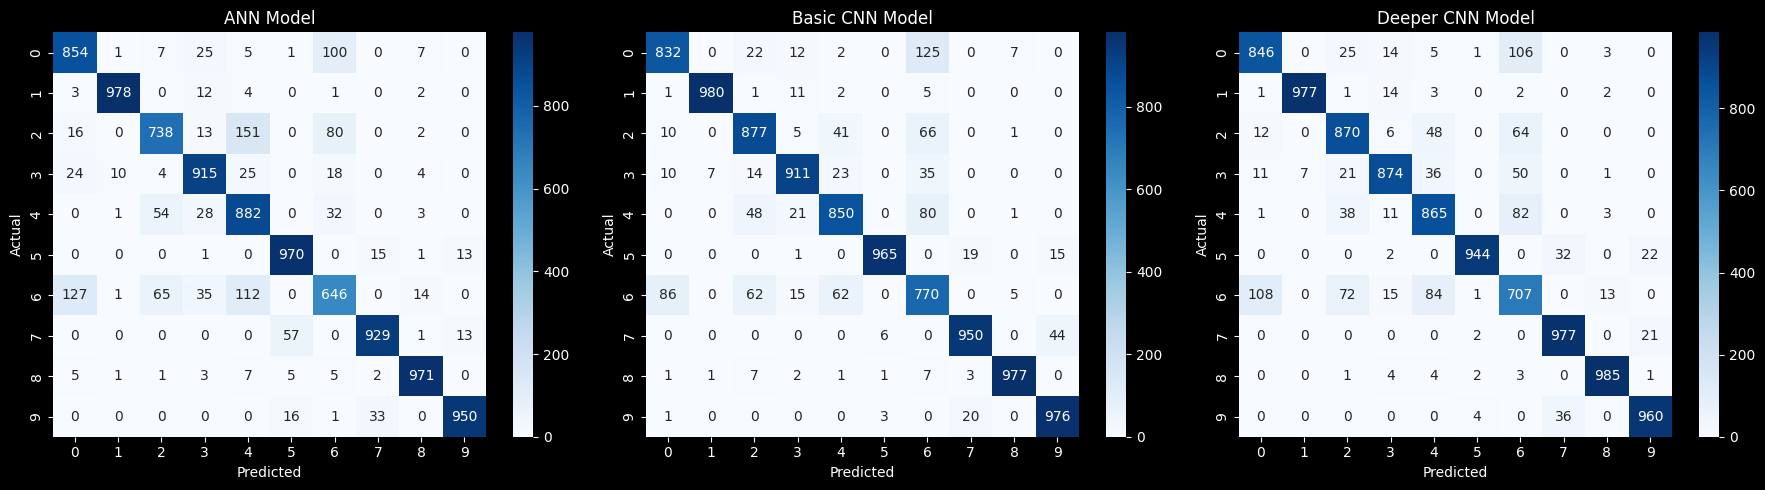

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


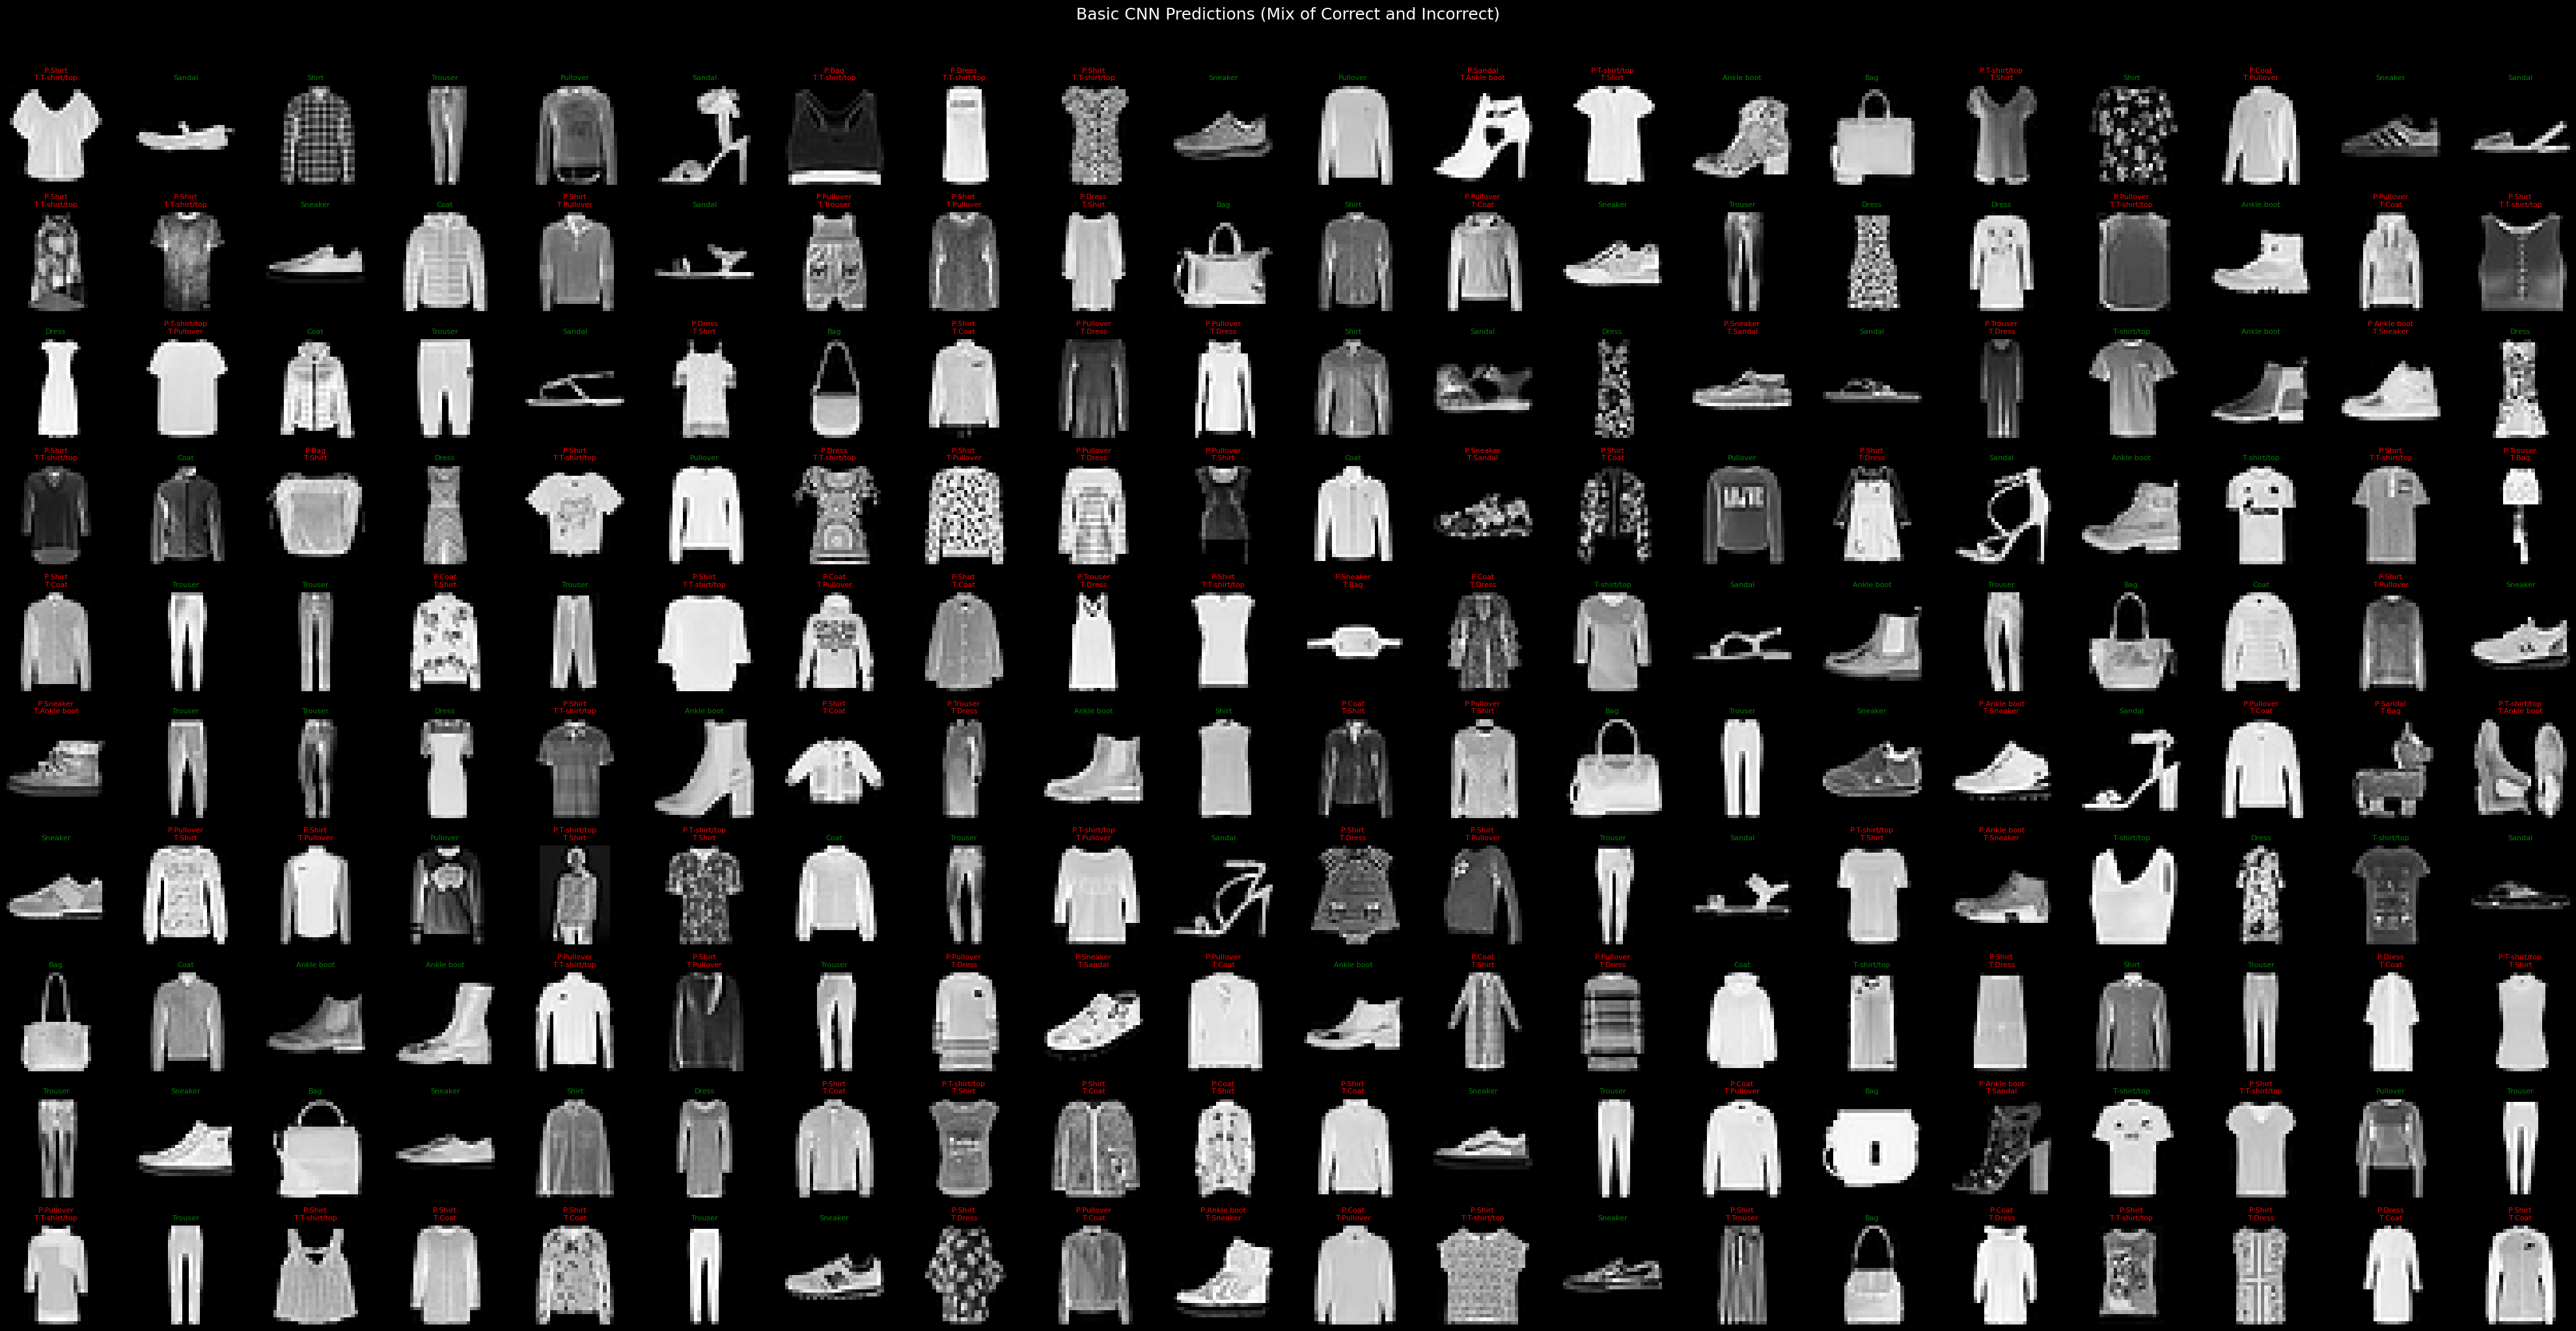

In [16]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

#**Home Work**

#**Dataset setup**
CIFAR-100 contains 60,000 32×32 color images across 100 fine-grained classes, split into 50,000 training and 10,000 test images, which are available directly via Keras as (x_train, y_train), (x_test, y_test) using keras.datasets.cifar100.load_data. The dataset’s pixel values are uint8 in the range 0–255 and the default label mode is “fine” with class indices 0–99, with an optional “coarse” mode for 20 superclasses if desired. This assignment adapts Fashion-MNIST methods to CIFAR-100, accounting for RGB inputs with shape (32, 32, 3) and 100 output classes rather than grayscale (28, 28, 1) and 10 classes.

In [17]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


In [18]:
# 1) Imports and reproducibility
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
tf.random.set_seed(42)

# 2) Load CIFAR-100
# label_mode='fine' yields 100-class labels (0..99)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')

print("Raw shapes -> x_train:", x_train.shape, "y_train:", y_train.shape,
      "x_test:", x_test.shape, "y_test:", y_test.shape)


Raw shapes -> x_train: (50000, 32, 32, 3) y_train: (50000, 1) x_test: (10000, 32, 32, 3) y_test: (10000, 1)


#**Preprocessing**
Normalize image pixels to by dividing by 255.0 since Keras provides uint8 data with values between 0 and 255, which improves optimization stability and convergence for neural networks. Convert labels to one-hot encodings (100 classes) for softmax classification and verify the final shapes match the expected (N, 32, 32, 3) for images and (N, 100) for labels

In [19]:
# 3) Preprocess: normalize and one-hot encode
num_classes = 100
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

y_train_oh = to_categorical(y_train, num_classes=num_classes)
y_test_oh  = to_categorical(y_test,  num_classes=num_classes)

print("Processed shapes -> x_train:", x_train.shape, "y_train_oh:", y_train_oh.shape)
print("Processed shapes -> x_test:", x_test.shape, "y_test_oh:", y_test_oh.shape)


Processed shapes -> x_train: (50000, 32, 32, 3) y_train_oh: (50000, 100)
Processed shapes -> x_test: (10000, 32, 32, 3) y_test_oh: (10000, 100)


#**Model architectures**
Two architectures are provided: a simple ANN (baseline) and a stronger CNN that better exploits spatial structure in color images, with the CNN expected to substantially outperform the ANN on CIFAR-100’s fine-grained classes. The ANN flattens the (32, 32, 3) input and uses dense layers with dropout and batch normalization; the CNN uses standard convolutional blocks with batch normalization, data augmentation, pooling, and global average pooling before classification.

In [20]:
# 4) Baseline ANN model for CIFAR-100
def build_ann(input_shape=(32,32,3), num_classes=100):
    inputs = keras.Input(shape=input_shape)
    x = layers.Flatten()(inputs)
    x = layers.Dense(512, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs, name="ANN_CIFAR100")
    return model

ann = build_ann()
ann.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ],
)
ann.summary()

# 5) CNN model with data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
    ],
    name="augmentation",
)

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, 3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)
    return x

def build_cnn(input_shape=(32,32,3), num_classes=100):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = conv_block(x, 64)
    x = conv_block(x, 128)
    x = conv_block(x, 256)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs, name="CNN_CIFAR100")
    return model

cnn = build_cnn()
cnn.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ],
)
cnn.summary()


Model: "ANN_CIFAR100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,476 (6.61 MB)

 Trainable params: 1,731,940 (6.61 MB)

 Non-trainable params: 1,536 (6.00 KB)

Model: "CNN_CIFAR100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmentation (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,239,588 (4.73 MB)

 Trainable params: 1,237,796 (4.72 MB)

 Non-trainable params: 1,792 (7.00 KB)

#***Training configuration***
Use EarlyStopping to stop when validation performance stops improving and ModelCheckpoint to save the best model weights or model file, as per Keras callback recommendations. Monitor val_loss for EarlyStopping with patience to allow for minor fluctuations, and monitor val_accuracy for ModelCheckpoint with save_best_only=True and mode='max' to keep the best classifier by validation accuracy.

In [21]:
# 6) Callbacks for robust training
os.makedirs("checkpoints", exist_ok=True)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True,
    mode="min",
    verbose=1,
)

ann_ckpt_path = "checkpoints/best_ann.keras"
ann_ckpt = keras.callbacks.ModelCheckpoint(
    filepath=ann_ckpt_path,
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    verbose=1,
)

cnn_ckpt_path = "checkpoints/best_cnn.keras"
cnn_ckpt = keras.callbacks.ModelCheckpoint(
    filepath=cnn_ckpt_path,
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    verbose=1,
)


#**Model evaluation**
Reload the best checkpointed models and evaluate them on the held-out test set to compare loss, accuracy, and top-5 accuracy, which is informative for 100-class problems. CIFAR-100’s evaluation should always use the canonical 10,000-image test set (x_test, y_test) that Keras provides to keep comparisons consistent across runs

In [24]:
# 7) Training runs
BATCH_SIZE = 128
EPOCHS_ANN = 60
EPOCHS_CNN = 100

history_ann = ann.fit(
    x_train, y_train_oh,
    validation_split=0.1,
    epochs=EPOCHS_ANN,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop, ann_ckpt],
    verbose=2,
)

history_cnn = cnn.fit(
    x_train, y_train_oh,
    validation_split=0.1,
    epochs=EPOCHS_CNN,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop, cnn_ckpt],
    verbose=2,
)


Epoch 1/60

Epoch 1: val_accuracy improved from -inf to 0.09000, saving model to checkpoints/best_ann.keras
352/352 - 9s - 26ms/step - accuracy: 0.0603 - loss: 4.5626 - top5_acc: 0.1996 - val_accuracy: 0.0900 - val_loss: 3.9716 - val_top5_acc: 0.2970
Epoch 2/60

Epoch 2: val_accuracy improved from 0.09000 to 0.12680, saving model to checkpoints/best_ann.keras
352/352 - 1s - 4ms/step - accuracy: 0.0967 - loss: 4.0012 - top5_acc: 0.2945 - val_accuracy: 0.1268 - val_loss: 3.7507 - val_top5_acc: 0.3568
Epoch 3/60

Epoch 3: val_accuracy improved from 0.12680 to 0.13880, saving model to checkpoints/best_ann.keras
352/352 - 2s - 6ms/step - accuracy: 0.1187 - loss: 3.8146 - top5_acc: 0.3384 - val_accuracy: 0.1388 - val_loss: 3.6502 - val_top5_acc: 0.3804
Epoch 4/60

Epoch 4: val_accuracy improved from 0.13880 to 0.15940, saving model to checkpoints/best_ann.keras
352/352 - 2s - 5ms/step - accuracy: 0.1335 - loss: 3.7219 - top5_acc: 0.3661 - val_accuracy: 0.1594 - val_loss: 3.5941 - val_top5_ac

#**Model evaluation**
Reload the best checkpointed models and evaluate them on the held-out test set to compare loss, accuracy, and top-5 accuracy, which is informative for 100-class problems. CIFAR-100’s evaluation should always use the canonical 10,000-image test set (x_test, y_test) that Keras provides to keep comparisons consistent across runs.

In [25]:
# 8) Load the best models and evaluate on test data
best_ann = keras.models.load_model(ann_ckpt_path)
best_cnn = keras.models.load_model(cnn_ckpt_path)

ann_test_metrics = best_ann.evaluate(x_test, y_test_oh, verbose=0)
cnn_test_metrics = best_cnn.evaluate(x_test, y_test_oh, verbose=0)

print("ANN test -> loss: %.4f  acc: %.4f  top5: %.4f" % tuple(ann_test_metrics))
print("CNN test -> loss: %.4f  acc: %.4f  top5: %.4f" % tuple(cnn_test_metrics))


ANN test -> loss: 3.2009  acc: 0.2316  top5: 0.5109
CNN test -> loss: 1.5319  acc: 0.6028  top5: 0.8668


#**Visualizing training history**

Plot training/validation loss, accuracy, and top-5 accuracy curves to diagnose underfitting or overfitting and to contextualize EarlyStopping behavior. These plots help interpret whether the CNN’s added capacity translates into better generalization on validation data over the ANN baseline.

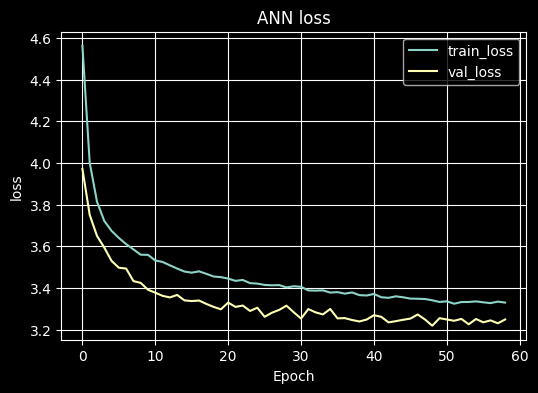

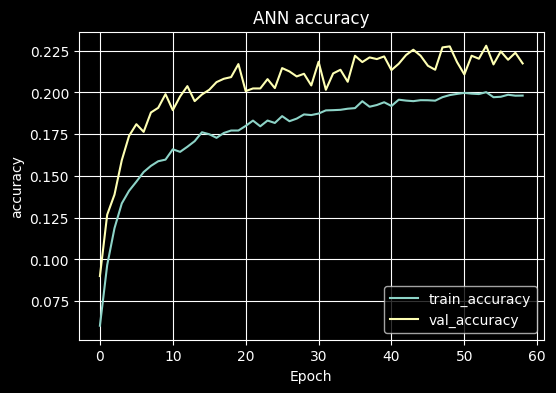

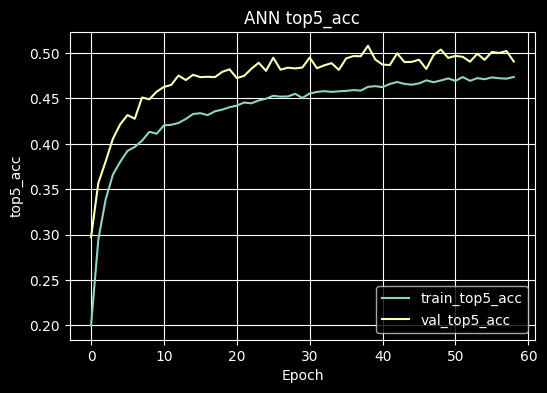

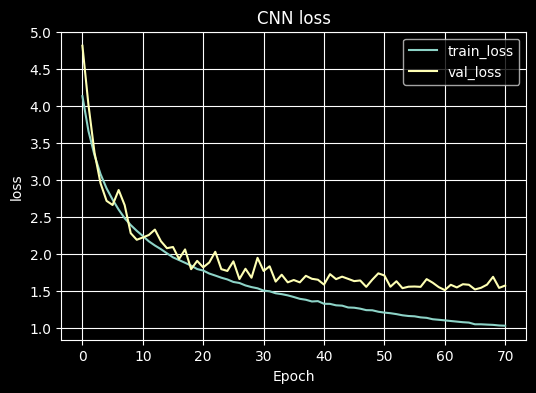

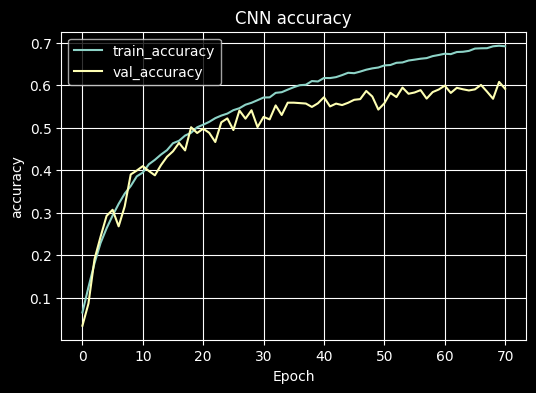

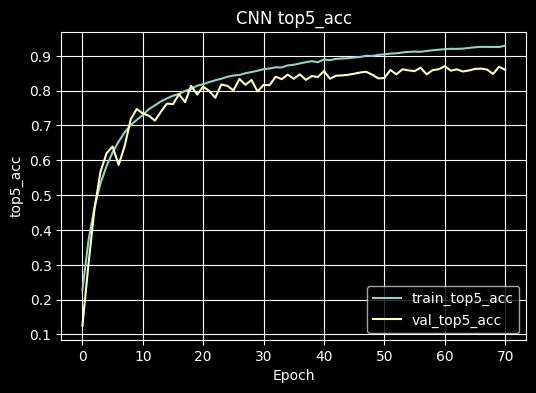

In [26]:
# 9) History plots for ANN and CNN
def plot_history(hist, title_prefix=""):
    metrics = ["loss", "accuracy", "top5_acc"]
    for m in metrics:
        if m in hist.history and ("val_" + m) in hist.history:
            plt.figure(figsize=(6,4))
            plt.plot(hist.history[m], label=f"train_{m}")
            plt.plot(hist.history["val_" + m], label=f"val_{m}")
            plt.title(f"{title_prefix} {m}")
            plt.xlabel("Epoch")
            plt.ylabel(m)
            plt.legend()
            plt.grid(True)
            plt.show()

plot_history(history_ann, "ANN")
plot_history(history_cnn, "CNN")


#**Confusion matrix**
Generate a confusion matrix on the test set to visualize class-wise performance and common confusions, which are expected in fine-grained categories of CIFAR-100. For readability across 100 classes, use a normalized confusion matrix and complement it with a classification report to inspect precision and recall per class.

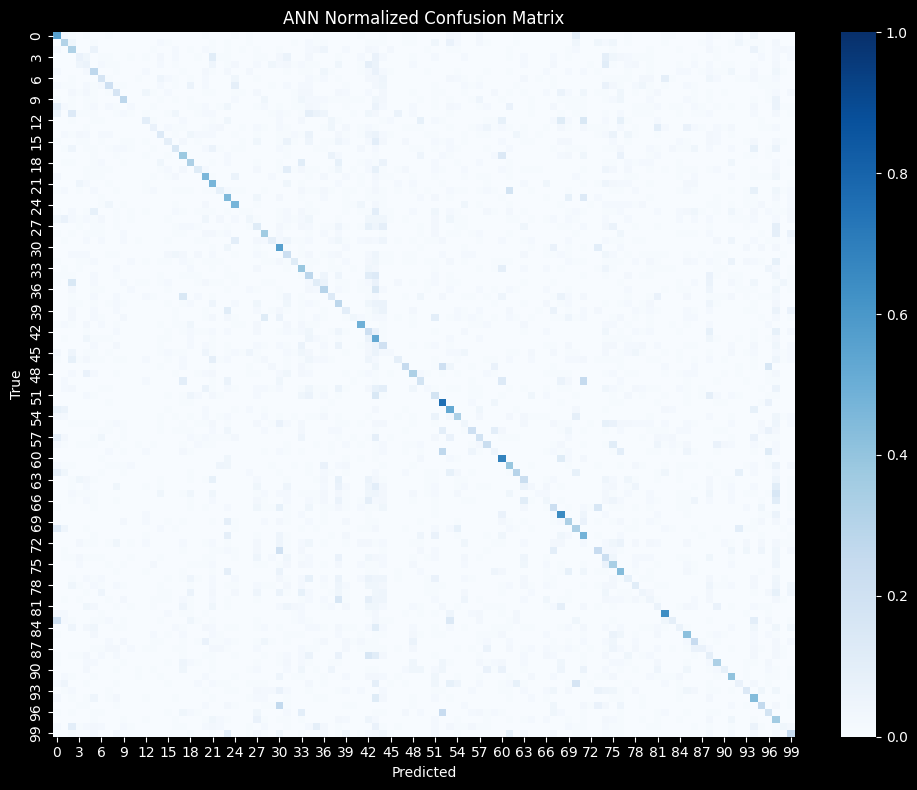

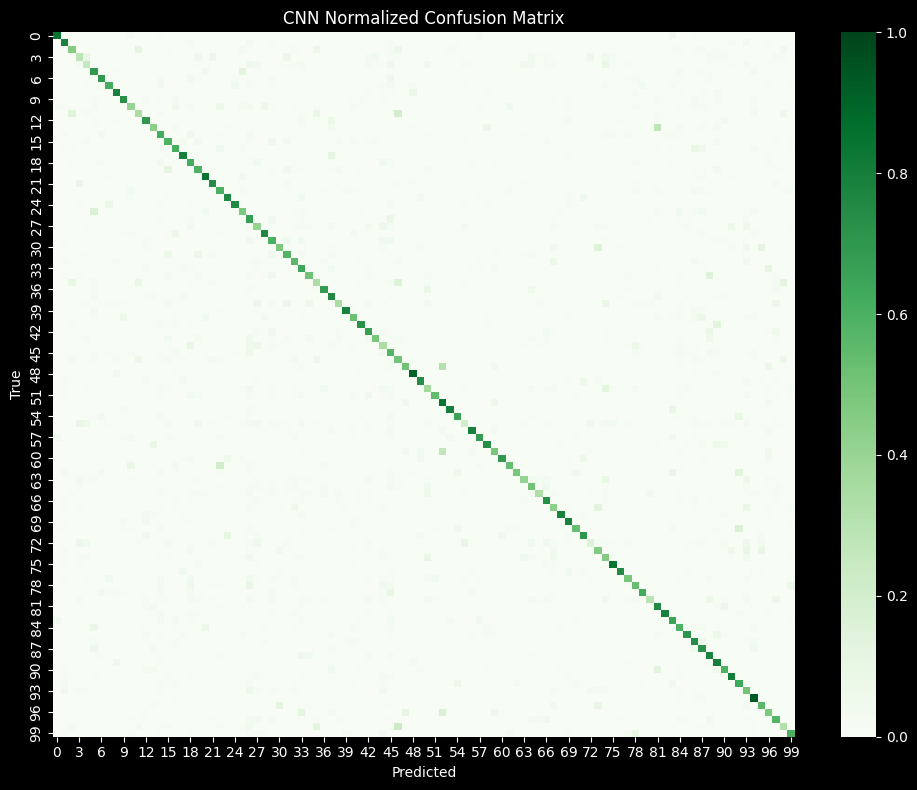

ANN classification report:
              precision    recall  f1-score   support

           0     0.3128    0.5600    0.4014       100
           1     0.3229    0.3100    0.3163       100
           2     0.2078    0.3200    0.2520       100
           3     0.1346    0.0700    0.0921       100
           4     0.0625    0.0600    0.0612       100
           5     0.2231    0.2700    0.2443       100
           6     0.2429    0.1700    0.2000       100
           7     0.3500    0.2100    0.2625       100
           8     0.2152    0.1700    0.1899       100
           9     0.4000    0.2800    0.3294       100
          10     0.1000    0.0200    0.0333       100
          11     0.0000    0.0000    0.0000       100
          12     0.2222    0.1000    0.1379       100
          13     0.2593    0.0700    0.1102       100
          14     0.2203    0.1300    0.1635       100
          15     0.1875    0.0900    0.1216       100
          16     0.2679    0.1500    0.1923       100


In [27]:
# 10) Confusion matrix and classification report
y_true = y_test.squeeze()
y_pred_cnn = np.argmax(best_cnn.predict(x_test, verbose=0), axis=1)
y_pred_ann = np.argmax(best_ann.predict(x_test, verbose=0), axis=1)

cm_cnn = confusion_matrix(y_true, y_pred_cnn, labels=np.arange(num_classes), normalize='true')
cm_ann = confusion_matrix(y_true, y_pred_ann, labels=np.arange(num_classes), normalize='true')

plt.figure(figsize=(10,8))
sns.heatmap(cm_ann, cmap="Blues", vmin=0, vmax=1)
plt.title("ANN Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(cm_cnn, cmap="Greens", vmin=0, vmax=1)
plt.title("CNN Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

print("ANN classification report:")
print(classification_report(y_true, y_pred_ann, digits=4))

print("CNN classification report:")
print(classification_report(y_true, y_pred_cnn, digits=4))


#**Prediction analysis**
Inspect a batch of test images to compare predicted vs true classes and examine softmax confidence to understand whether errors arise from low-confidence guesses or systematic confusion between visually similar categories. Additionally, computing top-5 accuracy can reveal whether the correct class tends to appear among the most likely predictions, which is informative on datasets with many fine-grained labels.

CNN samples:


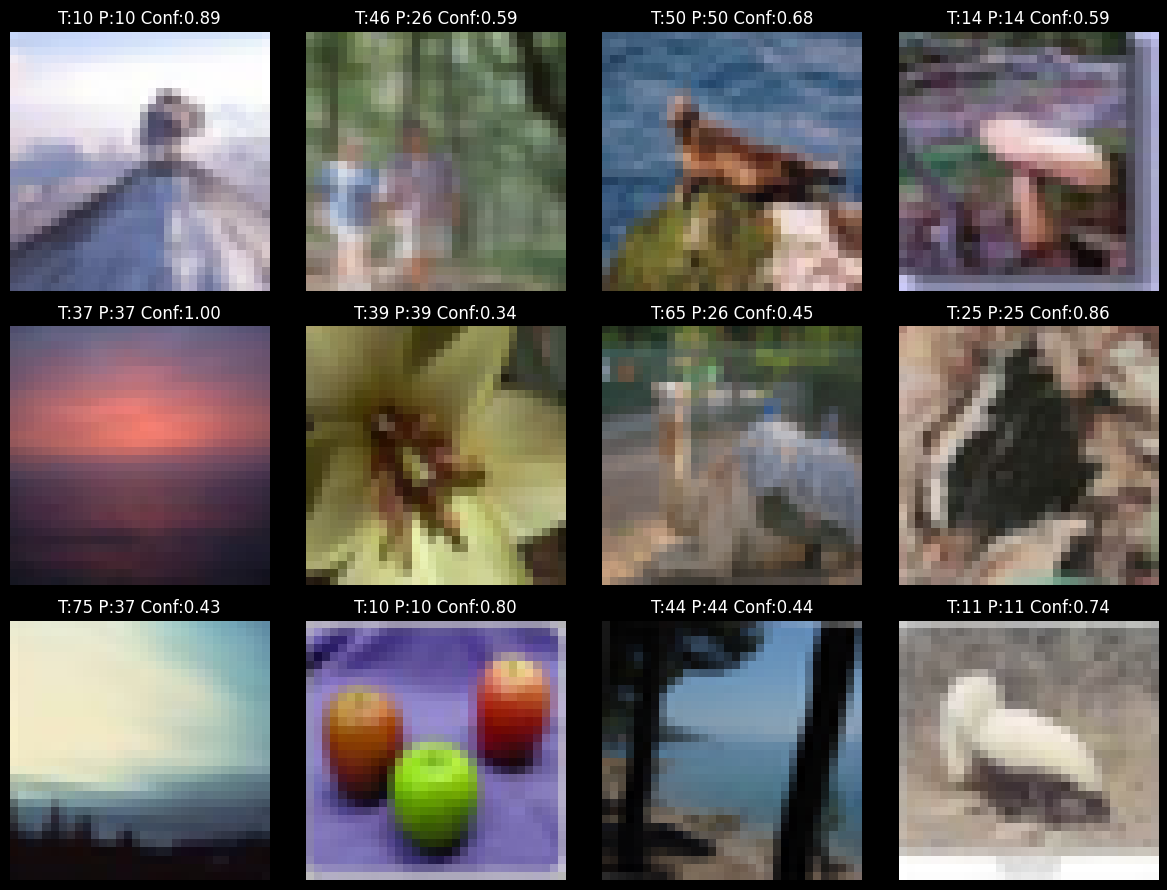

ANN samples:


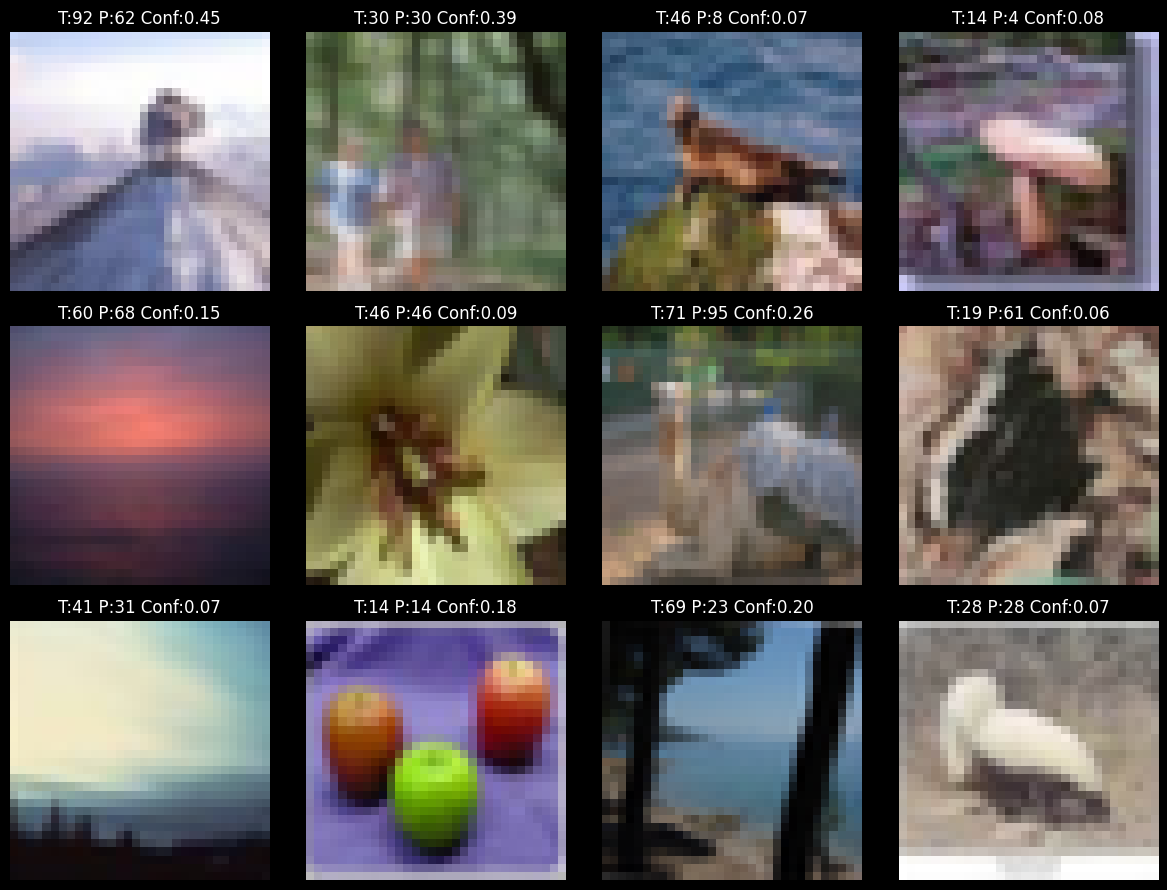

In [28]:
# 11) Sample prediction visualization and confidence
def show_samples(model, images, labels, n=12):
    idxs = np.random.choice(len(images), size=n, replace=False)
    probs = model.predict(images[idxs], verbose=0)
    preds = np.argmax(probs, axis=1)
    trues = labels[idxs].squeeze()

    cols = 4
    rows = n // cols + int(n % cols != 0)
    plt.figure(figsize=(12, 3*rows))
    for i, idx in enumerate(idxs):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i])
        plt.axis("off")
        title = f"T:{trues[i]} P:{preds[i]} Conf:{probs[i, preds[i]]:.2f}"
        plt.title(title)
    plt.tight_layout()
    plt.show()

print("CNN samples:")
show_samples(best_cnn, x_test, y_test, n=12)

print("ANN samples:")
show_samples(best_ann, x_test, y_test, n=12)


#**What was learned**
CIFAR-100 requires models to learn from color textures and subtle shapes across 100 fine classes, so a CNN with data augmentation generally outperforms a flattened ANN that ignores 2D spatial structure. EarlyStopping and ModelCheckpoint streamline training by halting when validation loss plateaus and retaining the best model by validation accuracy, enabling fair comparison of architectures without manual intervention.

#**Notes and references**
used Keras/TensorFlow CIFAR-100 dataset API and exact shapes, pixel ranges, and label modes were followed to ensure correct input and output preparation for 100 classes.

EarlyStopping and ModelCheckpoint usage follows Keras callback documentation for stopping criteria and saving “best” models based on monitored metrics.

With this pipeline, the assignment objectives—dataset setup, preprocessing, ANN and CNN model building, training with callbacks, evaluation on the test set, history and confusion matrix visualizations, and prediction analysis—are fully addressed for CIFAR-100 in a manner consistent with Keras best practices and dataset specifications.